In [ ]:
import sys
sys.path.append('../')

In [2]:
from deepnmf.companion.agent import AutoDirectoryAgent

## Some notes on parameters:
- `file_ordering` is a callable that operates on the path objects to return a sort key. 
- The tolerance is set very low. If things are taking too long, change the `max_iter` parameter. This is the maximum number of itterations in the gradient descent optimiztion. 
- There is a chance that things get unstable. In this case there are two useful loss functions you can play with. `beta` controls this. 2 for euclidian distance, 1 for KL-divergence. unconstrained sklearn behavior is euclidian distance. 
- Again for stability you can try and add some L2-regularization. Probably unecessary, but it's there if you want it. `alpha` Default is 0, anything more than 1 is ridiculous. 

In [3]:
da = AutoDirectoryAgent('../example_data/NaCl_CrCl3_pdf_ramp/', 
                        n_components=3, 
                        data_spec="*.chi", # glob specifier
                        x_lim=(1,10), # region of interest
                        header=0, # number of header lines, '#' is used for comments
                        figsize=(18,5),
                        file_ordering=lambda x: float(x.stem.split('_')[-2][1:-1]), # Sort key for path objects
                        
                        # Model/Fit parameters
                        max_iter=500,
                        beta=2, # Metric. {2: Euclidian distance, 1: KL divergence, else: don't worry about it}
                        alpha=0. # Amount of L2-regularization. Aka dervative/weight supression. Keepin it light and breezy. 
                       )

<Figure size 1296x360 with 0 Axes>

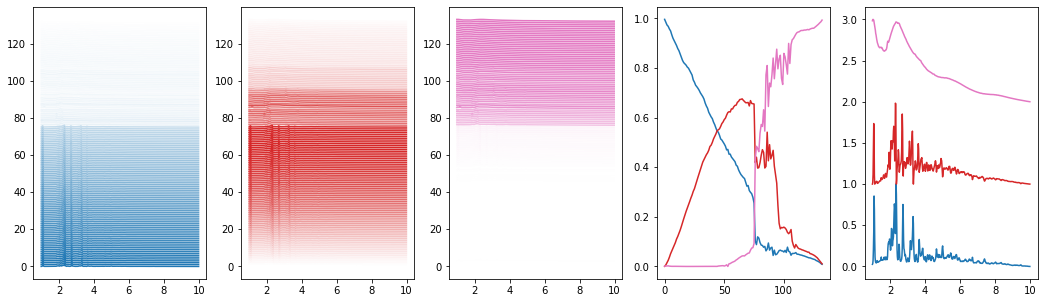

KeyboardInterrupt: 

In [4]:
da.spin(sleep_delay=2.0, timeout=None)